In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"D:\Codebase\Python\Data Cleaning\Data Clening Concepts\loan_data.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,NaN,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,NaN,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [3]:
dataset['CoapplicantIncome'].fillna(dataset['CoapplicantIncome'].mean(), inplace=True)

C:\Users\vadik\AppData\Local\Temp\ipykernel_6224\2117298730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['CoapplicantIncome'].fillna(dataset['CoapplicantIncome'].mean(), inplace=True)


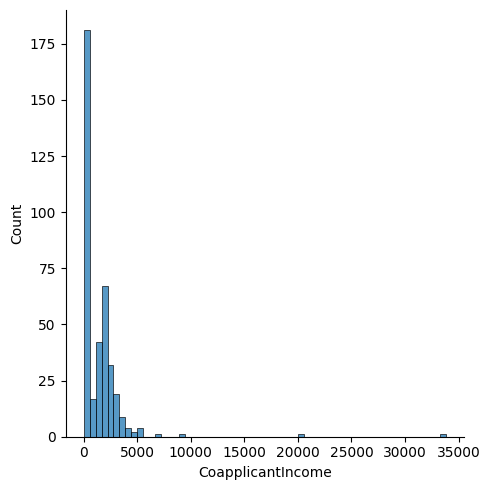

In [6]:
sns.displot(x="CoapplicantIncome", data=dataset)
plt.show()

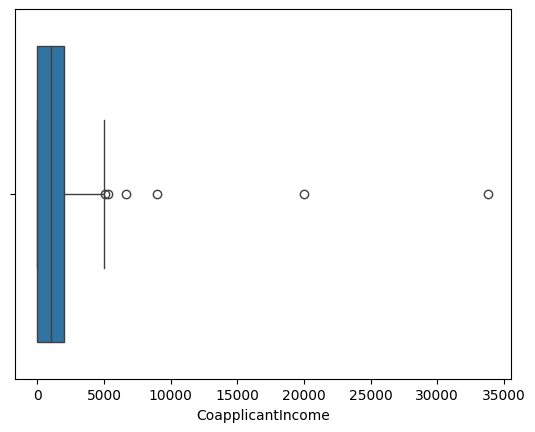

In [9]:
sns.boxplot(x="CoapplicantIncome", data=dataset)
plt.show()

In [13]:
# Removing Outlier

In [14]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
IQR = q3 - q1

In [15]:
min_r = q1 - (1.5*IQR)
max_r = q3 + (1.5*IQR)
min_r, max_r

(-1.8396681166949032, 1.6066352447317251)

In [17]:
dataset = dataset[dataset["CoapplicantIncome"]<max_r]

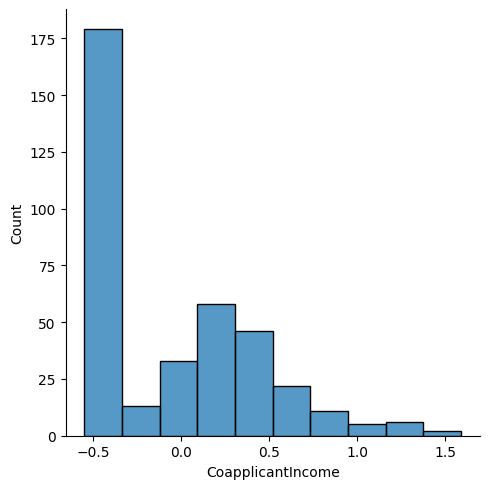

In [18]:
sns.displot(dataset["CoapplicantIncome"])
plt.show()

In [20]:
dataset.shape

(375, 13)

In [22]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [24]:
ft = FunctionTransformer(func=np.log1p)

In [26]:
ft.fit(dataset[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [27]:
dataset["CoapplicantIncome_ft"] = ft.transform(dataset[["CoapplicantIncome"]])

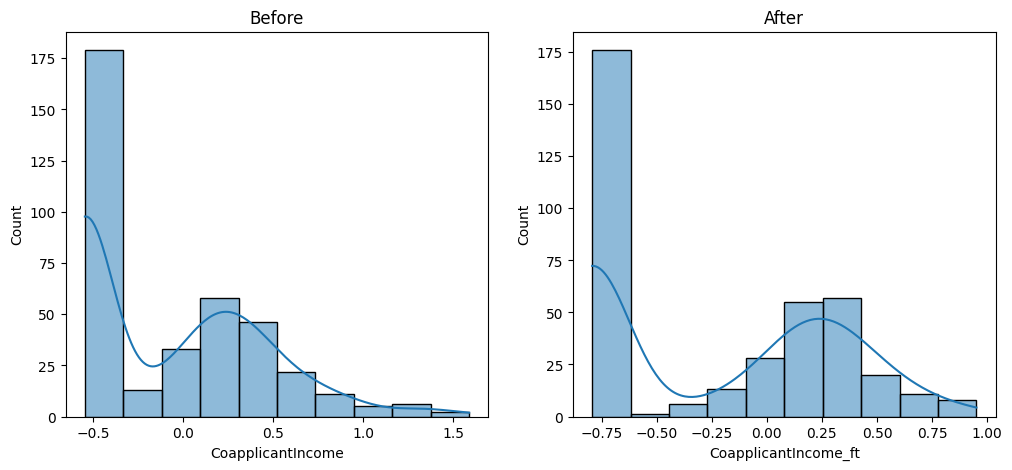

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Before")
sns.histplot(dataset["CoapplicantIncome"], kde=True)

plt.subplot(1, 2, 2)
plt.title("After")
sns.histplot(dataset["CoapplicantIncome_ft"], kde=True)

plt.show()